# Homework 1

## IMPORTANT NOTES
**Teams**
- You are encouraged to work in teams of two.
- Each team member must submit the file!
- State that you worked as a team: in the filename and/or inside the notebook.

**Submission**
- deadline is Wednesdays 8 am (such that I can give you feedback until the tutorial)
- extended deadline is Wednesday 4 pm (with a 25% point deduction)
- Put your name into the file name and upload to ILIAS (each team member).
- We recommend solving the theoretical exercises inside the notebook, which will improve your Latex skills. Alternatively, submit the theoretical exercises as pdf.

**Use of LLMs**
- you are allowed and encouraged to use LLMs (github copilot is free for students, Le Chat, ChatGPT, etc.)
- you must edit the code! Especially, make sure
    - you understand the code,
    - that it's correct
    - that it's concise
- you are responsible for your submission

**Plots**
- plots must have every element labeled (axes, lines, dots, ...)
- optionally, make your plots nicer: sns.despine(), ax.legend(frameon=False), etc.
- choose a reasonable figsize (big enough to have everything visible, small enough to fit within the width of a hypothetical half or full A4 page)

In [2]:
from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, color='k', t_max=10., ax=None):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    if ax is None:
        ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial, ith + .5, ith + 1.5, color=color)
        
    # plot vertical red dotted line at t_max
    ax.axvline(x=t_max, color='r', linestyle='--')
    
    ax.set_ylim(.5, len(event_times_list) + .5)
    ax.set_yticks([])
    ax.set_ylabel('Spike train')
    ax.set_xlim((0,t_max+0.5))
    ax.set_xlabel('Time [s]')
    return ax

## Exercise 1

1) Take interval [0,10 sec]. We will simulate spikes within this interval to form a Poisson spike train. To do so we are going to use exponenetial distribution for inter-spike intervals. First spike-time (relative to time 0) is drawn from the exponential distribution with parameter $\tau$ , thus $t_1 \sim Exp(\tau) = 1/\tau e^{-t_1/\tau}$. All subsequent spikes are determined relative to the previous via $t_{k+1} = t_k + \Delta t$ with $\Delta t \sim Exp(\tau)$. Stop when the new spike-time exceed 10 sec. (1.5 points per each sub-task, tasks with a "*" give additional points)

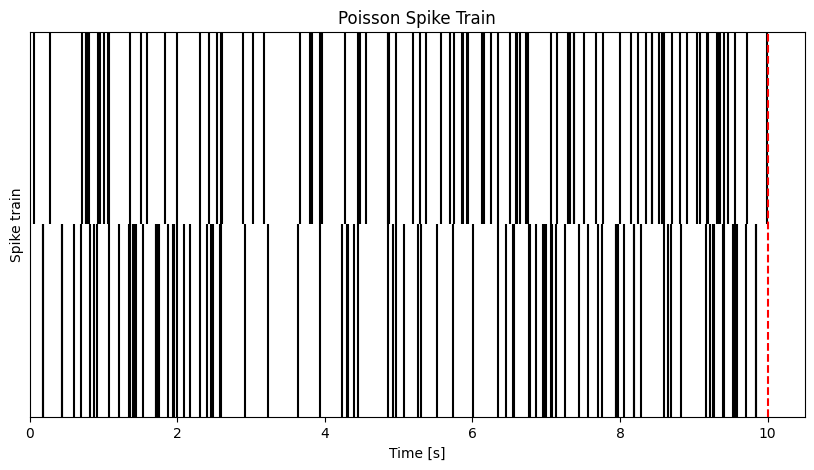

In [4]:
def poisson_spike_train(tau, length, n_trials):
    """
    Generates a Poisson spike train
    Parameters
    ----------
    tau : float
          the time constant of the exponential distribution
    length : float
             the length of the spike train in seconds
    n_trials : int
               number of trials to generate
    Returns
    -------
    spike_times_list : list of lists
                       each sublist contains the spike times for a trial
    """
    spike_times_list = []
    expected_spike_count = int(length / tau) * 2 # Overshoot to be safe
    
    for _ in range(n_trials):
        # Generate inter-spike intervals from an exponential distribution
        isi = np.random.exponential(tau, size = expected_spike_count) 
        # Generate spike times by taking the cumulative sum of ISIs
        spike_times = np.cumsum(isi)
        spike_times_list.append(spike_times[spike_times <= length])
    
    return spike_times_list

# test
spike_times = poisson_spike_train(0.1, 10, 2)

# Plot the spike trains
plt.figure(figsize=(10, 5))
raster(spike_times, color='k', t_max=10)
# p
plt.title('Poisson Spike Train')
plt.show()

a) Plot one spike train for each of the following parameter values: $\tau = 1$ sec, $\tau = 0.1$ sec, $\tau = 0.01$ sec  

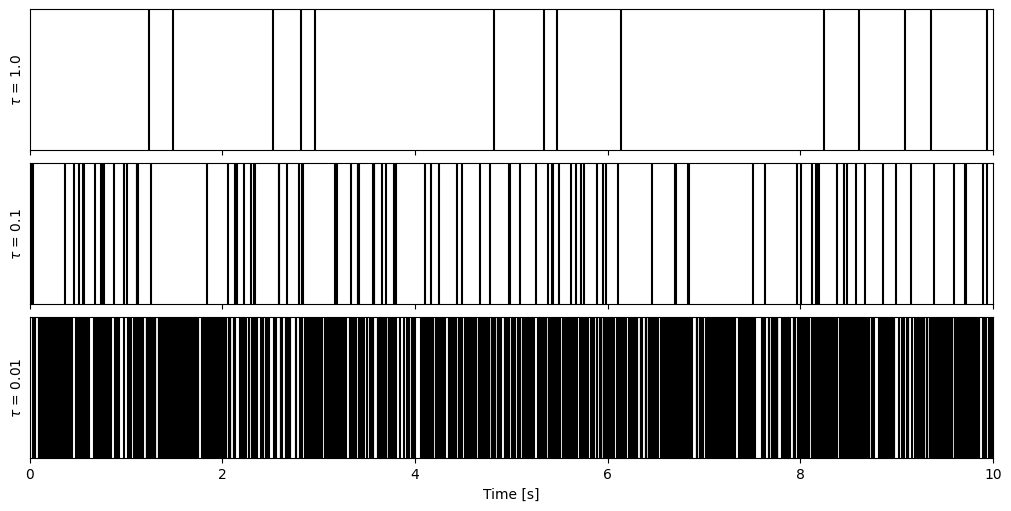

In [5]:
length = 10
taus = [1., 0.1, 0.01]

fig, axs = plt.subplots(nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True)
for tau, ax in zip(taus, axs):
    spike_times = poisson_spike_train(tau, length, 1)
    for ith, trial in enumerate(spike_times):
        ax.vlines(trial, ith + .5, ith + 1.5, color='k')
    ax.set_ylim(.5, len(spike_times) + .5)
    ax.set_yticks([])
    ax.set_ylabel("$\\tau$ = " + str(tau))
    ax.set_xlim((0,length))
    if tau == taus[-1]:
        ax.set_xlabel('Time [s]')

b) Simulate 50.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance (not standard deviation).

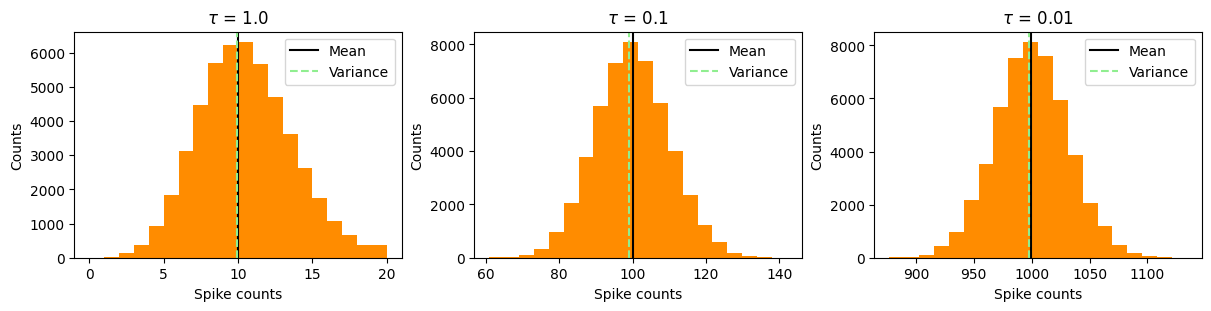

In [6]:
fig, axs = plt.subplots(ncols=len(taus), figsize=(12, 3), constrained_layout=True)
num_trials = 50000
for tau, ax in zip(taus, axs):
    spike_times = poisson_spike_train(tau, length, num_trials)
    ax.hist([len(trial) for trial in spike_times], bins=20, color="darkorange")
    # plot mean and variance
    mean = np.mean([len(trial) for trial in spike_times])
    var = np.var([len(trial) for trial in spike_times])
    ax.axvline(mean, color='black', label='Mean')
    ax.axvline(var, color='lightgreen', linestyle='--', label='Variance')
    
    ax.set_title("$\\tau$ = " + str(tau))
    ax.set_xlabel('Spike counts')
    ax.set_ylabel('Counts')
    ax.legend()
    
plt.show()

c) Draw 10.000 samples $x_k \in \{0, 1\}$ independently from a Beronulli distribution $P (x_k ) = \lambda^{x_k} (1 − \lambda)^{1−x_k}$ with $k = 1, \ldots , 10.000$ for the following three cases: $\lambda = 0.1$, $\lambda = 0.01$, $\lambda = 0.001$. Plot the random vector $x$ as a spike train for each of the three conditions.

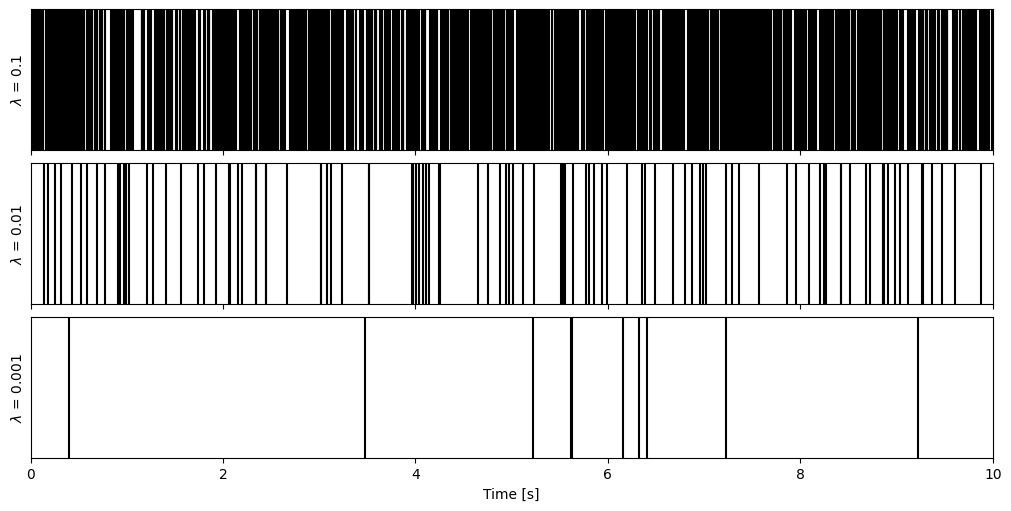

In [9]:
def bernoulli_spike_train(p, n_samples, n_trials):
    """
    Generates a Bernoulli spike train
    Parameters
    ----------
    p : float
        the probability of a spike occurring
    n_samples : int
                number of samples in each trial
    n_trials : int
               number of trials to generate
    Returns
    -------
    spike_times_list : list of lists
                       each sublist contains the spike times for a trial
    """
    spike_times_list = []
    
    for _ in range(n_trials):
        spikes = np.random.binomial(n=1, p=p, size=n_samples)
        spike_times = np.where(spikes)[0]  # Get indices where spikes occurred
        spike_times_list.append(spike_times)
    
    return spike_times_list

num_samples = 10000
ps = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(nrows=len(ps), figsize=(10, 5), sharex=True, constrained_layout=True)
for p, ax in zip(ps, axs):
    spike_times = bernoulli_spike_train(p, num_samples, 1)
    for ith, trial in enumerate(spike_times):
        ax.vlines(trial*1e-3, ith + .5, ith + 1.5, color='k')
    ax.set_ylim(.5, len(spike_times) + .5)
    ax.set_yticks([])
    ax.set_ylabel("$\lambda$ = " + str(p))
    ax.set_xlim((0,num_samples*1e-3))
    if p == ps[-1]:
        ax.set_xlabel('Time [s]')
plt.show()

d) Simulate 50.000 spike trains for each parameter in c) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance.

How do the results differ from those b)?

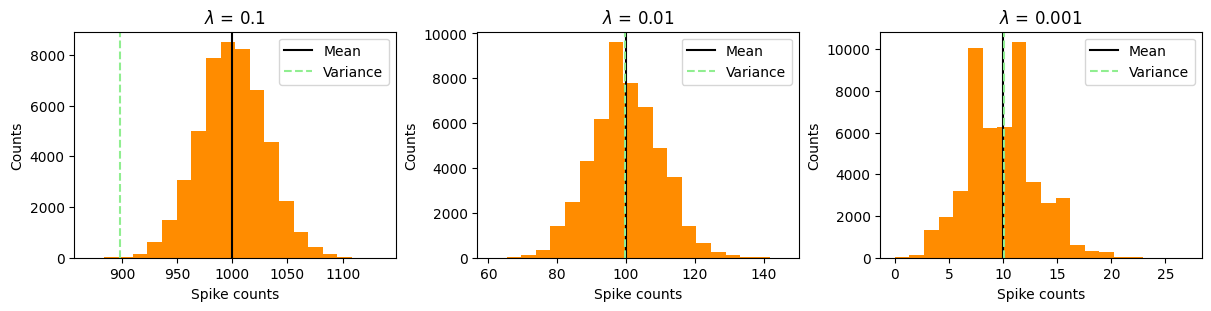

In [10]:
fig, axs = plt.subplots(ncols=len(ps), figsize=(12, 3), constrained_layout=True)
num_trials = 50000
for p, ax in zip(ps, axs):
    spike_times = bernoulli_spike_train(p, num_samples, num_trials)
    ax.hist([len(trial) for trial in spike_times], bins=20, color="darkorange")
    # plot mean and variance
    mean = np.mean([len(trial) for trial in spike_times])
    var = np.var([len(trial) for trial in spike_times])
    ax.axvline(mean, color='black', label='Mean')
    ax.axvline(var, color='lightgreen', linestyle='--', label='Variance')
    
    ax.set_title("$\lambda$ = " + str(p))
    ax.set_xlabel('Spike counts')
    ax.set_ylabel('Counts')
    ax.legend()
plt.show()

**Answer:** The histogram in (b) is created from a Poisson distribution, thus the mean and variance are almost equal. The histograms in (d) look similar (normal) but their means and variance are different. We see that for large $\lambda$ the variance is less than mean which is true for a binomial distribution. With decreasing $\lambda$, the variance approaches mean and becomes essentially equal for $\lambda=0.001$ i.e. for large $n$ and small $p$ a binomial distribution tends to a poisson distribution.

e) The cases in which the distributions in b) and d) match and disagree with each other is related to the limit cases discussed in the lecture. Under which circumstance do the Binomial distribution and the Poisson distribution match each other? Under these assumptions, proof, by taking the limit, that the probability functions are the same. (2 points)

*Hint: Relate $\lambda$, $p$, and $n$ to each other. Take the appropriate limit* $$\lim_{\substack{? \to\infty \\ ?\to 0}}$$
*and show that $P_{Bernoulli}(X=s)$ in the limit is the same as $P_{Poisson}(X=s)$.*

**Answer**


**Proof** The Binomial and Poisson distributions match under the limit where $ n \to \infty$, $p \to 0$, and the product $\lambda = np$ remains constant.
We start from the Binomial probability mass function:
$$
P_{\text{Binomial}}(X = s) = \binom{n}{s} p^s (1 - p)^{n - s}
$$
First, expand the binomial coefficient:
$$
\binom{n}{s} = \frac{n(n - 1)(n - 2) \cdots (n - s + 1)}{s!}
$$
When $n$ is large and $s$ is fixed (small compared to $n$), we can approximate:
$$
\binom{n}{s} \approx \frac{n^s}{s!}
$$
Next, approximate the term $(1-p)^{n-s}$. Since $s$ is small compared to $n$, we have:
$$
(1 - p)^{n - s} \approx (1 - p)^n
$$
Using the limit:
$$
\lim_{n \to \infty, \, p \to 0, \, np = \lambda} (1 - p)^n = e^{-\lambda}
$$
we find:
$$
(1 - p)^n \to e^{-\lambda}
$$
Now, substitute $p = \frac{\lambda}{n}$. Then:
$$
n^s p^s = n^s \left(\frac{\lambda}{n}\right)^s = \lambda^s
$$
Putting everything together:
$$
P_{\text{Binomial}}(X = s) \approx \frac{n^s}{s!} p^s e^{-\lambda} = \frac{\lambda^s}{s!} e^{-\lambda}
$$
Thus, we conclude:
$$
\lim_{n \to \infty, p \to 0, np = \lambda} P_{\text{Binomial}}(X = s) = P_{\text{Poisson}}(X = s) = \frac{\lambda^s}{s!} e^{-\lambda}
$$
$\square$



## Exercise 2
2) Compute the mean and variance of the Poisson distribution with parameter $\lambda$ (first try yourself) (3 points)

**Answer**
$$
\begin{equation*}
P(x = k) = \text{Poisson}(k \  ; \lambda) = \frac{\lambda^{k} \cdot e^{-\lambda}}{k\,!}
\end{equation*} 
$$

$$
Mean:
\begin{equation*}
\begin{split}
E(x) & =  \lambda \\
\end{split}
\end{equation*}
$$

$$
Variance:
\begin{equation*}
\begin{split}
Var(x) & = \lambda \\
\end{split}
\end{equation*}
$$

**Mean**:
The mean $\mathbb{E}[X]$ is defined as:
$$
\mathbb{E}[X] = \sum_{k=0}^{\infty} k \, P(X=k) = \sum_{k=0}^{\infty} k \, \frac{\lambda^k e^{-\lambda}}{k!}
$$
We can solve by:
- moving $e^{-\lambda}$ to the front because it is a factor independent of k (Step 3)
- pulling out the case $k=0$ from the sum (Step 4)
- we can then combine the factor $k$ with $\frac{1}{k!}$ and pull out one factor $\lambda$ by moving the index back to $k=0$
- then using the equality $e^{\lambda}=\sum_{k = 0}^{\infty} \frac{\lambda^{k}}{k!}$ in Step 8
$$
<\br> Overall:
\begin{align}
\mathbb{E}[X] & =\sum_{k=0}^{\infty}k*P(X=k) \\
 & =\sum_{k = 0}^{\infty}k*\frac{\lambda^{k}e^{-\lambda}}{k!} \\
 & =e^{-\lambda}\sum_{k = 0}^{\infty}k*\frac{\lambda^{k}}{k!} \\
 & =e^{-\lambda}\left( 0+\sum_{k = 1}^{\infty} k*\frac{\lambda^{k}}{k!} \right) \\
 & =e^{-\lambda}\sum_{k = 1}^{\infty} \frac{\lambda^{k}}{(k-1)!} \\
 & =e^{-\lambda}\sum_{k = 0}^{\infty} \frac{\lambda^{k+1}}{(k-1+1)!} \\
 & =e^{-\lambda}\lambda \sum_{k = 0}^{\infty} \frac{\lambda^{k}}{k!} \\
 & =e^{-\lambda}\lambda e^{\lambda} \\
 & =\lambda
\end{align}


$$



**Variance**:
The variance is given by:
$$
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$

First, compute $\mathbb{E}[X(X-1)]$:
$$
\mathbb{E}[X(X-1)] = \sum_{k=0}^{\infty} k(k-1) \frac{\lambda^k e^{-\lambda}}{k!}
$$
Simplify:
$$
= e^{-\lambda} \sum_{k=2}^{\infty} \frac{\lambda^k}{(k-2)!}
$$

Shift the summation index: let $k' = k-2$, so $k = k'+2$. Then:
$$
= e^{-\lambda} \lambda^2 \sum_{k'=0}^{\infty} \frac{\lambda^{k'}}{k'!} = e^{-\lambda} \lambda^2 e^{\lambda} = \lambda^2
$$

Thus:
$$
\mathbb{E}[X^2] = \mathbb{E}[X(X-1)] + \mathbb{E}[X] = \lambda^2 + \lambda
$$

Now compute variance:
$$
\text{Var}(X) = (\lambda^2 + \lambda) - \lambda^2 = \lambda
$$

Thus:
$$
\boxed{\text{Var}(X) = \lambda}
$$


## Exercise 3
3) Show that the sum of two independent Poisson random variables of parameters $\lambda$ and $\mu$ is again Poisson with
parameter $\lambda + \mu $. (2 points)

If $X \sim \text{Poisson}(\lambda) $ and $Y \sim \text{Poisson}(\mu)$, we have:
\begin{equation*}
\begin{split}
P(k = X + Y) & = \sum_{i=0}^{k} P(X = i, Y = k - i) \\
\end{split}
\end{equation*}

Substituting the Poisson probability mass functions:
$$
= \sum_{i=0}^{k} \left( \frac{\lambda^i e^{-\lambda}}{i!} \right) \left( \frac{\mu^{k-i} e^{-\mu}}{(k-i)!} \right)
$$

Simplify:
$$
= e^{-(\lambda+\mu)} \sum_{i=0}^{k} \frac{\lambda^i \mu^{k-i}}{i! (k-i)!}
$$

Notice that:
$$
\frac{1}{i!(k-i)!} = \frac{1}{k!} \binom{k}{i}
$$

Thus:
$$
= e^{-(\lambda+\mu)} \frac{1}{k!} \sum_{i=0}^{k} \binom{k}{i} \lambda^i \mu^{k-i}
$$

Recognize the binomial expansion:
$$
(\lambda + \mu)^k = \sum_{i=0}^{k} \binom{k}{i} \lambda^i \mu^{k-i}
$$

Thus:
$$
P(X+Y = k) = e^{-(\lambda+\mu)} \frac{(\lambda+\mu)^k}{k!}
$$

which is the probability mass function of a Poisson distribution with parameter $\lambda + \mu$.

Thus:
$$
\boxed{X+Y \sim \text{Poisson}(\lambda+\mu)}
$$
